In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Malgun Gothic'

### 평가문제 1

In [2]:
# 1-1. 파일에서 데이터를 읽고 구별 컬럼을 인덱스로 만들기
df = pd.read_csv('../02.Pandas/cctv_pop.csv', index_col='구별')
df.head(3)

,CCTV댓수,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
종로구,1715,20.69,153789,144683,9106,27818,5.92,18.09
중구,2447,78.98,131787,122499,9288,24392,7.05,18.51
용산구,2611,78.64,237285,222953,14332,39070,6.04,16.47


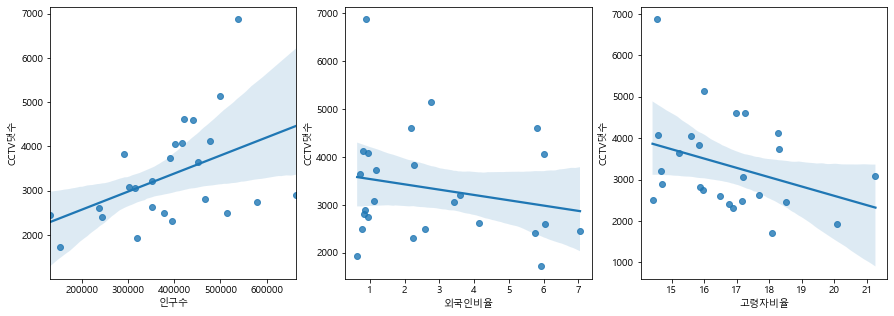

In [3]:
# 1-2. 한 줄에 세 개의 플롯 그리기 (10점)
# 1-3. CCTV댓수와 인구수, 외국인비율, 고령자비율에 대한 Regression Plot 그리기 (10점)
_, axs = plt.subplots(1, 3, figsize=(15,5))
features = ['인구수', '외국인비율', '고령자비율']
for i, feature in enumerate(features):
    sns.regplot(x=feature, y='CCTV댓수', data=df, ax=axs[i])

### 평가문제 2

In [10]:
# 2-1. 구별 면적당 CCTV 댓수 컬럼을 만드세요. (10점)
area = pd.read_csv('../03.시각화/서울시구별면적.txt', skiprows=1, sep='\t')
area.head()

,기간,자치구,면적,구성비(%),행정,법정,통,반
0,2020,서울시,605.23,100.00,425,467,"12,764","95,940"
1,2020,종로구,23.91,3.95,17,87,279,"1,475"
2,2020,중구,9.96,1.65,15,74,253,"1,580"
3,2020,용산구,21.87,3.61,16,36,354,"2,581"
4,2020,성동구,16.86,2.79,17,17,467,"3,626"


In [11]:
area = area[['자치구','면적']]
area.drop([0], inplace=True)
area.set_index('자치구', inplace=True)
area.index.name = '구별'
area.head()

,면적
구별,
종로구,23.91
중구,9.96
용산구,21.87
성동구,16.86
광진구,17.06


In [13]:
df = df.join(area)
df.head()

,CCTV댓수,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율,면적
구별,,,,,,,,,
종로구,1715,20.69,153789,144683,9106,27818,5.92,18.09,23.91
중구,2447,78.98,131787,122499,9288,24392,7.05,18.51,9.96
용산구,2611,78.64,237285,222953,14332,39070,6.04,16.47,21.87
성동구,3829,63.49,292672,285990,6682,46380,2.28,15.85,16.86
광진구,3211,112.29,352627,339996,12631,51723,3.58,14.67,17.06


In [15]:
df['면적당_CCTV댓수'] = round(df.CCTV댓수 / df.면적, 2)
df.head()

,CCTV댓수,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율,면적,면적당_CCTV댓수
구별,,,,,,,,,,
종로구,1715,20.69,153789,144683,9106,27818,5.92,18.09,23.91,71.73
중구,2447,78.98,131787,122499,9288,24392,7.05,18.51,9.96,245.68
용산구,2611,78.64,237285,222953,14332,39070,6.04,16.47,21.87,119.39
성동구,3829,63.49,292672,285990,6682,46380,2.28,15.85,16.86,227.11
광진구,3211,112.29,352627,339996,12631,51723,3.58,14.67,17.06,188.22


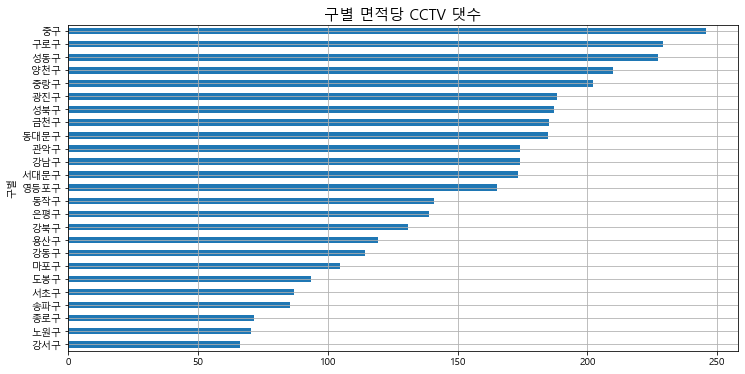

In [16]:
# 2-2. 구별 면적당 CCTV 댓수값이 큰 순서로 표시되도록 수평막대그래프로 그리세요. (10점)
df.면적당_CCTV댓수.sort_values().plot(kind='barh', grid=True, figsize=(12,6))
plt.title('구별 면적당 CCTV 댓수', fontsize=15)
plt.show()

In [17]:
# 2-3. 구별 면적당 CCTV 댓수를 단계구분도(Choropleth)로 그리세요. (10점)
import json, folium
filename = '../04.지도시각화/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(filename, encoding='utf-8'))

In [19]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
folium.Choropleth(
    geo_data=geo_str,
    data=df.면적당_CCTV댓수,
    columns=[df.index, df.면적당_CCTV댓수],
    fill_color='PuRd',
    key_on='feature.id'
).add_to(map)
title_html = '<h3 align="center" style="font-size:20px">CCTV per area</h3>'    
map.get_root().html.add_child(folium.Element(title_html)) 
map

### 평가문제 3

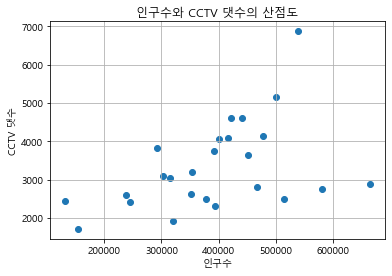

In [20]:
# 3-1. 인구수와 CCTV 댓수의 산점도를 그리세요. (10점)
plt.scatter(x=df.인구수, y=df.CCTV댓수)
plt.title('인구수와 CCTV 댓수의 산점도')
plt.xlabel('인구수'), plt.ylabel('CCTV 댓수')
plt.grid(); plt.show()

In [21]:
# 3-2. 위 산점도에 회귀선을 그리세요. (10점)
weight, bias = np.polyfit(df.인구수, df.CCTV댓수, 1)
x = np.array([100000, 700000])
y = weight * x + bias

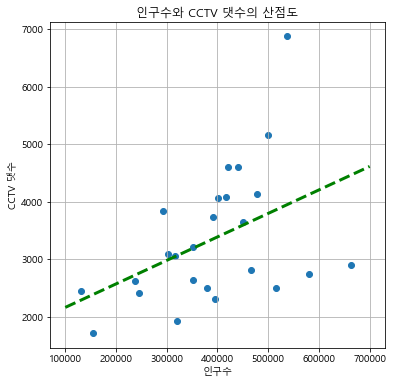

In [22]:
plt.figure(figsize=(6,6))
plt.scatter(x=df.인구수, y=df.CCTV댓수)
plt.plot(x, y, 'g--', lw=3)             # green(g), dashed(--)
plt.title('인구수와 CCTV 댓수의 산점도')
plt.xlabel('인구수'), plt.ylabel('CCTV 댓수')
plt.grid(); plt.show()

In [23]:
# 3-3. 위 그림에 회귀선과 실제값의 차이를 기준으로 컬러를 설정하고, color bar를 표시하세요. (10점)
df['오차'] = abs(df.CCTV댓수 - (df.인구수*weight + bias)).round(2)
df_sort = df.sort_values(by='오차', ascending=False)

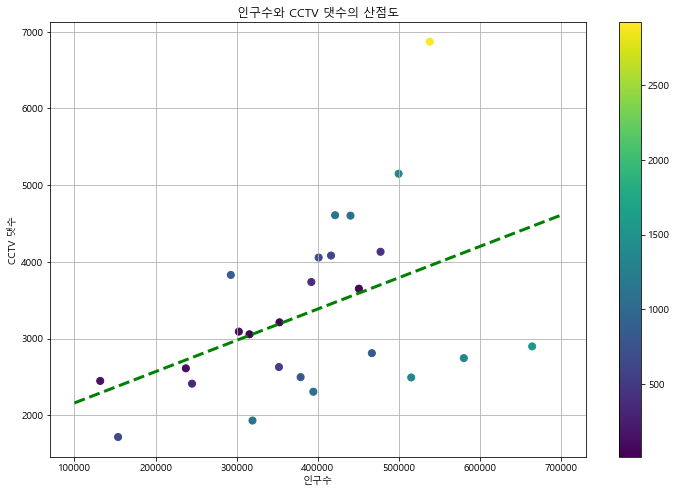

In [24]:
plt.figure(figsize=(12,8))
plt.scatter(x=df.인구수, y=df.CCTV댓수, c=df.오차, s=50)
plt.plot(x, y, 'g--', lw=3)             # green(g), dashed(--)
plt.title('인구수와 CCTV 댓수의 산점도')
plt.xlabel('인구수'), plt.ylabel('CCTV 댓수')
plt.colorbar()
plt.grid(); plt.show()

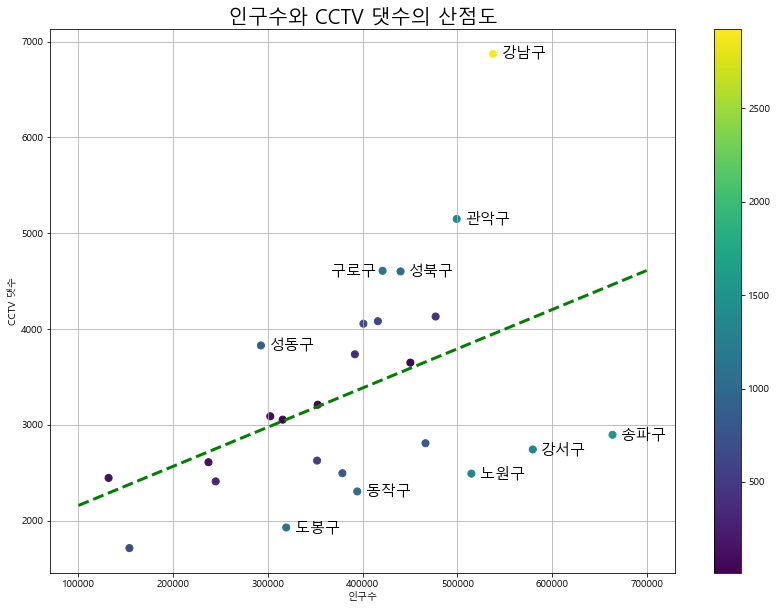

In [30]:
# 3-4. 위 그림에 회귀선과 실제값의 차이가 가장 큰 10개구의 이름을 표시하세요. (10점)
plt.figure(figsize=(14,10))
plt.scatter(x=df.인구수, y=df.CCTV댓수, c=df.오차, s=50)
plt.plot(x, y, 'g--', lw=3)            
for i in range(10):
    if i==5:            # 구로구
        plt.text(df_sort.인구수[i]-55000, df_sort.CCTV댓수[i]-50,
                df_sort.index[i], fontsize=15)
    else:
        plt.text(df_sort.인구수[i]+9000, df_sort.CCTV댓수[i]-50,
                df_sort.index[i], fontsize=15)
plt.title('인구수와 CCTV 댓수의 산점도', fontsize=20)
plt.xlabel('인구수'), plt.ylabel('CCTV 댓수')
plt.colorbar()
plt.grid(); plt.show()